In [1]:
import numpy as np
import pandas as pd
from os import listdir
import random
random.seed()   
import sklearn.mixture as mix
import talib
import matplotlib.pyplot as plt
from matplotlib import cm
import time
%matplotlib inline
import seaborn as sns
from scipy.stats import pearsonr
from hmmlearn import hmm
np.random.seed(42)
from sklearn.externals import joblib

# Load data from Reuters

In [4]:
import TALIB
data = TALIB.getX('TFMBQc1')
n = len(data.columns)
X =  data[data.columns[0]].values
print(X)
print(n)
    

[ 27.282  27.217  27.368 ...,  19.277  20.14   19.796]
50


# train model with optimal number of hidden states

In [5]:
for i in range(n):
    X =  data[['TTF_CCI','TTF_ROC','TTF_ROCP','TTF_ROCP','TTF_ROCR100','TTF_ATR','TTF_HT_TRENDMODE',data.columns[i+1]]].values
    model = hmm.GaussianHMM(n_components=2, n_iter=10000).fit(X)
    hidden_states=model.predict(X)    
    returns = ((data['TTF_CLOSE'] - data['TTF_CLOSE'].shift(10))<0)*1
    score = max(sum(returns == hidden_states),len(returns)-sum(returns == hidden_states))/float(len(returns))
    print(data.columns[i+1],score)


C:\Users\j649957\AppData\Local\conda\conda\envs\env1\lib\site-packages\sklearn\utils\deprecation.py:75: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\j649957\AppData\Local\conda\conda\envs\env1\lib\site-packages\sklearn\utils\deprecation.py:75: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\j649957\AppData\Local\conda\conda\envs\env1\lib\site-packages\sklearn\utils\deprecation.py:75: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 an

TTF_RSI 0.930662557781
TTF_ADX 0.936825885978
TTF_ADXR 0.937596302003
TTF_CCI 0.925269645609
TTF_DX 0.939137134052


C:\Users\j649957\AppData\Local\conda\conda\envs\env1\lib\site-packages\sklearn\utils\deprecation.py:75: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\j649957\AppData\Local\conda\conda\envs\env1\lib\site-packages\sklearn\utils\deprecation.py:75: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\j649957\AppData\Local\conda\conda\envs\env1\lib\site-packages\sklearn\utils\deprecation.py:75: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 an

TTF_CMO 0.930662557781
TTF_APO 0.932203389831
TTF_AROON_DOWN 0.885208012327
TTF_AROON_UP 0.91217257319


C:\Users\j649957\AppData\Local\conda\conda\envs\env1\lib\site-packages\sklearn\utils\deprecation.py:75: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\j649957\AppData\Local\conda\conda\envs\env1\lib\site-packages\sklearn\utils\deprecation.py:75: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\j649957\AppData\Local\conda\conda\envs\env1\lib\site-packages\sklearn\utils\deprecation.py:75: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 an

TTF_AROONOSC 0.893682588598
TTF_BOP 0.93374422188
TTF_MACDSIGNALS 0.936055469954
TTF_MACDHIST 0.93374422188
TTF_MFI 0.926040061633


C:\Users\j649957\AppData\Local\conda\conda\envs\env1\lib\site-packages\sklearn\utils\deprecation.py:75: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\j649957\AppData\Local\conda\conda\envs\env1\lib\site-packages\sklearn\utils\deprecation.py:75: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\j649957\AppData\Local\conda\conda\envs\env1\lib\site-packages\sklearn\utils\deprecation.py:75: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 an

TTF_MINUS_DI 0.925269645609
TTF_MINUS_DM 0.934514637904
TTF_MOM 0.929892141757
TTF_PLUS_DI 0.927580893683
TTF_PLUS_DM

C:\Users\j649957\AppData\Local\conda\conda\envs\env1\lib\site-packages\sklearn\utils\deprecation.py:75: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\j649957\AppData\Local\conda\conda\envs\env1\lib\site-packages\sklearn\utils\deprecation.py:75: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\j649957\AppData\Local\conda\conda\envs\env1\lib\site-packages\sklearn\utils\deprecation.py:75: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 an

 0.926810477658
TTF_PPO 0.932203389831
TTF_ROC 0.942218798151
TTF_ROCP 0.942218798151


C:\Users\j649957\AppData\Local\conda\conda\envs\env1\lib\site-packages\sklearn\utils\deprecation.py:75: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\j649957\AppData\Local\conda\conda\envs\env1\lib\site-packages\sklearn\utils\deprecation.py:75: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\j649957\AppData\Local\conda\conda\envs\env1\lib\site-packages\sklearn\utils\deprecation.py:75: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 an

TTF_ROCR 0.942218798151
TTF_ROCR100 0.942218798151
TTF_SLOWK 0.918335901387
TTF_SLOWD 0.925269645609


C:\Users\j649957\AppData\Local\conda\conda\envs\env1\lib\site-packages\sklearn\utils\deprecation.py:75: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\j649957\AppData\Local\conda\conda\envs\env1\lib\site-packages\sklearn\utils\deprecation.py:75: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\j649957\AppData\Local\conda\conda\envs\env1\lib\site-packages\sklearn\utils\deprecation.py:75: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 an

TTF_FASTK 0.925269645609
TTF_FASTD 0.918335901387
TTF_STOCHRSI0 0.929892141757
TTF_STOCHRSI1

C:\Users\j649957\AppData\Local\conda\conda\envs\env1\lib\site-packages\sklearn\utils\deprecation.py:75: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\j649957\AppData\Local\conda\conda\envs\env1\lib\site-packages\sklearn\utils\deprecation.py:75: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\j649957\AppData\Local\conda\conda\envs\env1\lib\site-packages\sklearn\utils\deprecation.py:75: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 an

 0.925269645609
TTF_TRIX 0.936825885978
TTF_ULTOSC_x 0.924499229584
TTF_ULTOSC_y 0.924499229584
TTF_ULTOSC 0.924499229584


C:\Users\j649957\AppData\Local\conda\conda\envs\env1\lib\site-packages\sklearn\utils\deprecation.py:75: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\j649957\AppData\Local\conda\conda\envs\env1\lib\site-packages\sklearn\utils\deprecation.py:75: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\j649957\AppData\Local\conda\conda\envs\env1\lib\site-packages\sklearn\utils\deprecation.py:75: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 an

TTF_WILLR 0.917565485362
TTF_AD 0.650231124807
TTF_ADOSC 0.936055469954


C:\Users\j649957\AppData\Local\conda\conda\envs\env1\lib\site-packages\sklearn\utils\deprecation.py:75: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\j649957\AppData\Local\conda\conda\envs\env1\lib\site-packages\sklearn\utils\deprecation.py:75: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\j649957\AppData\Local\conda\conda\envs\env1\lib\site-packages\sklearn\utils\deprecation.py:75: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 an

TTF_OBV 0.626348228043
TTF_ATR 0.939907550077
TTF_NATR 0.939907550077
TTF_TRANGE 0.93374422188
TTF_HT_DCPERIOD 0.936055469954


C:\Users\j649957\AppData\Local\conda\conda\envs\env1\lib\site-packages\sklearn\utils\deprecation.py:75: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\j649957\AppData\Local\conda\conda\envs\env1\lib\site-packages\sklearn\utils\deprecation.py:75: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\j649957\AppData\Local\conda\conda\envs\env1\lib\site-packages\sklearn\utils\deprecation.py:75: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 an

TTF_HT_DCPHASE 0.938366718028
TTF_HT_PHASOR_0 0.936825885978
TTF_HT_PHASOR_1 0.936055469954
TTF_HT_SINE_0 0.926040061633
TTF_HT_SINE_1 0.938366718028


C:\Users\j649957\AppData\Local\conda\conda\envs\env1\lib\site-packages\sklearn\utils\deprecation.py:75: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\j649957\AppData\Local\conda\conda\envs\env1\lib\site-packages\sklearn\utils\deprecation.py:75: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\j649957\AppData\Local\conda\conda\envs\env1\lib\site-packages\sklearn\utils\deprecation.py:75: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 an

TTF_HT_TRENDMODE 0.931432973806
TTF_CDL3OUTSIDE 0.53312788906


IndexError: index 50 is out of bounds for axis 0 with size 50

# Plot graph

C:\Users\j649957\AppData\Local\conda\conda\envs\env1\lib\site-packages\sklearn\utils\deprecation.py:75: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\j649957\AppData\Local\conda\conda\envs\env1\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\j649957\AppData\Local\conda\conda\envs\env1\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C

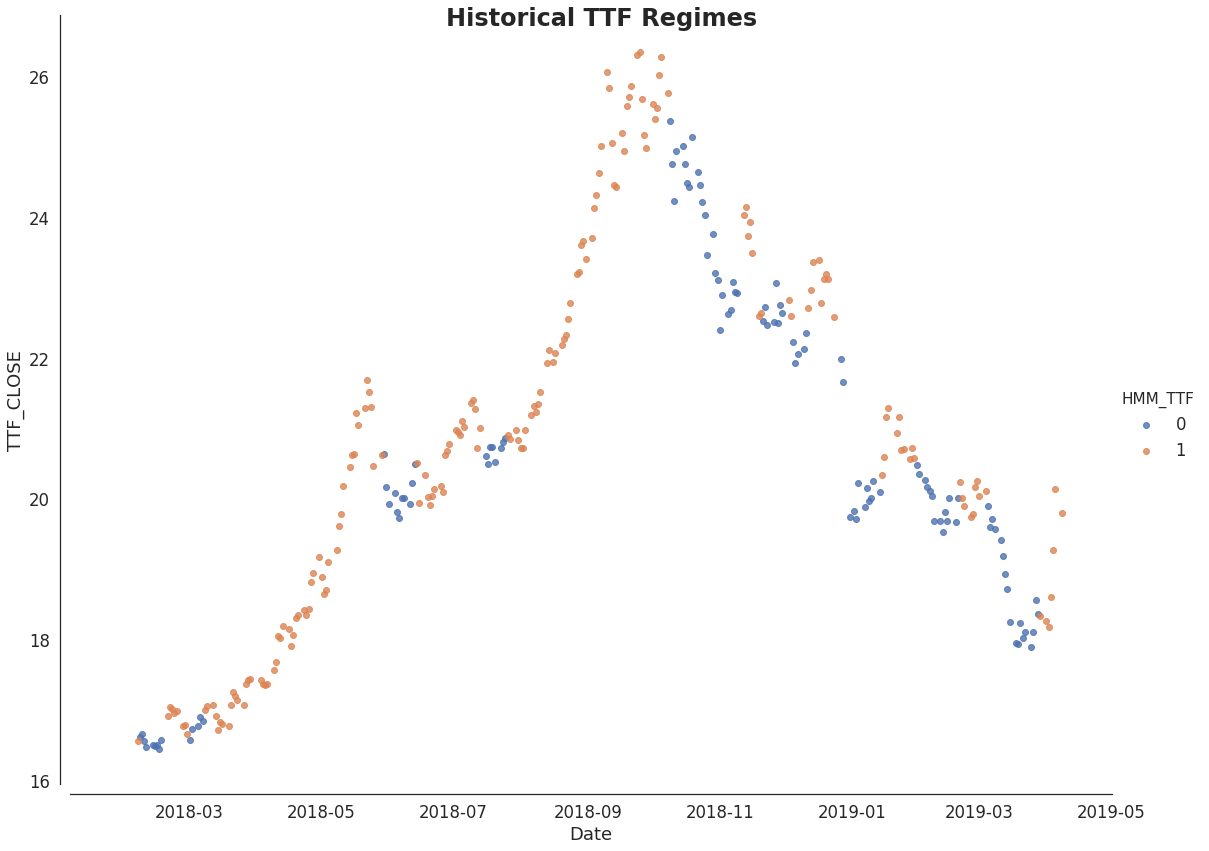

In [6]:
data_train = data[:1000]
data_test = data[1001:]

X_train =  data_train[['TTF_CCI','TTF_ROC','TTF_ROCP','TTF_ROCP','TTF_ROCR100','TTF_ATR','TTF_HT_TRENDMODE']].values
X_test =  data_test[['TTF_CCI','TTF_ROC','TTF_ROCP','TTF_ROCP','TTF_ROCR100','TTF_ATR','TTF_HT_TRENDMODE']].values

# X =  data[['TTF_CLOSE']].values
model = hmm.GaussianHMM(n_components=2, n_iter=10000).fit(X_train)
hidden_states=model.predict(X_test)    
data_test['HMM_TTF'] = hidden_states

style_kwds = {'xtick.major.size': 1, 'ytick.major.size': 1,
              'font.family':u'courier prime code', 'legend.frameon': True}
sns.set(font_scale=1.5)

states = (pd.DataFrame(data, columns=['states'],index=data_test.index).join(data_test, how='inner')
          .reset_index(drop=False)
          )
# print(data.index)
# display(states)
sns.set_style('white', style_kwds)
order = [0,1]
# # order = range(6)
fg = sns.FacetGrid(data=states, hue='HMM_TTF', hue_order=order,
                    aspect=1.31, size=12)
fg.map(plt.scatter, 'Date', 'TTF_CLOSE', alpha=0.8).add_legend()
sns.despine(offset=10)
fg.fig.suptitle('Historical TTF Regimes', fontsize=24, fontweight='demi')
fg.savefig('Hidden Markov (Mixture) Model_SPY Regimes.png')